/tmp/ipykernel_1723392/3045627872.py:44: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


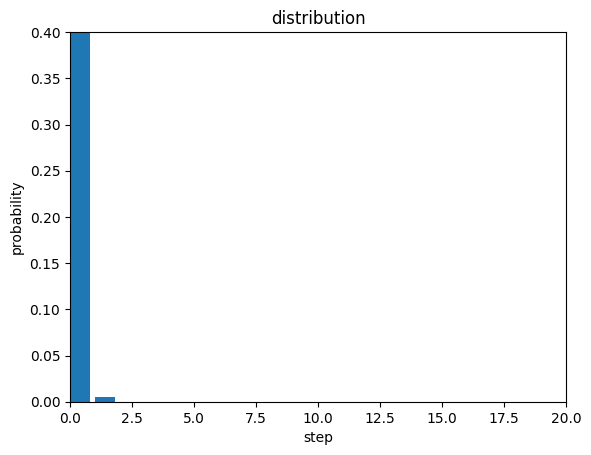

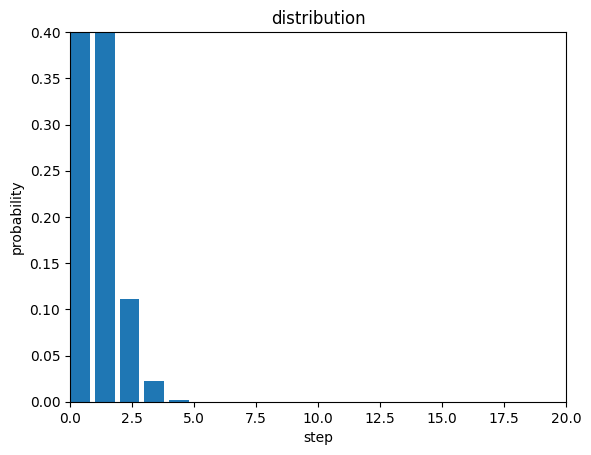

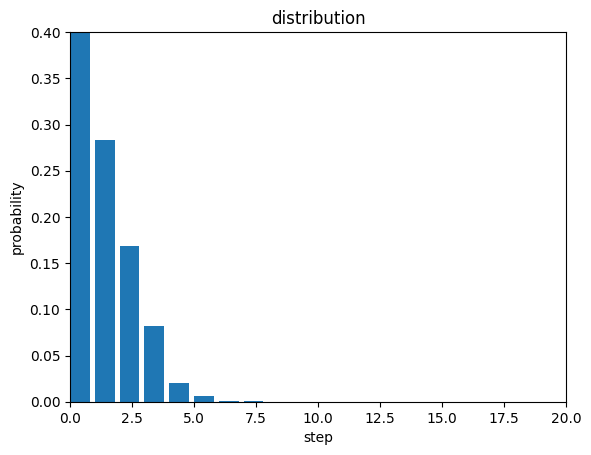

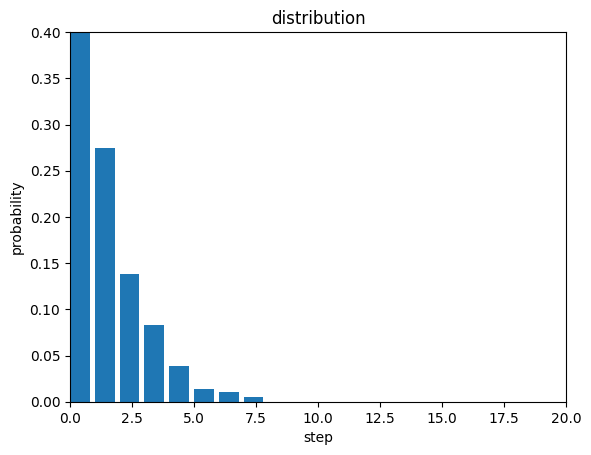

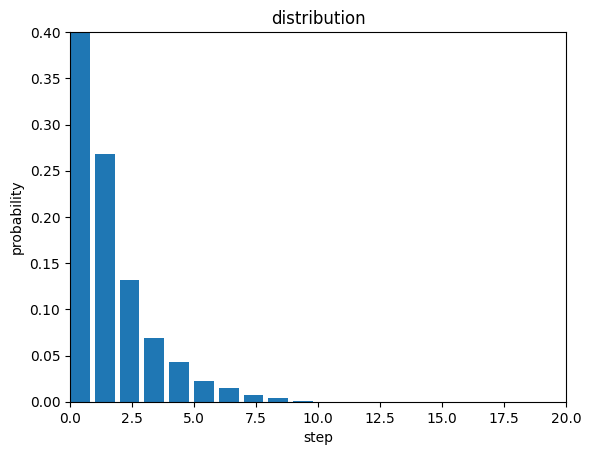

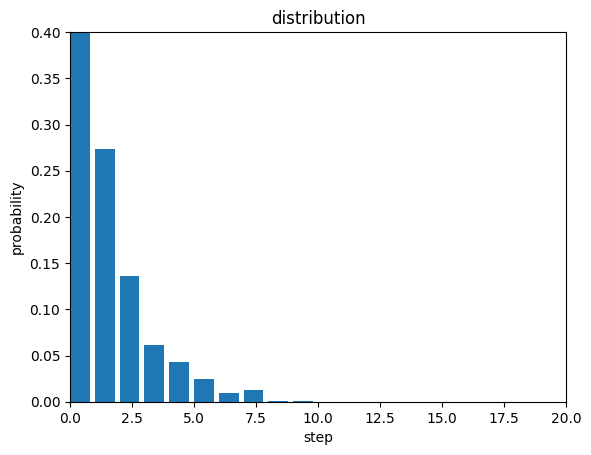

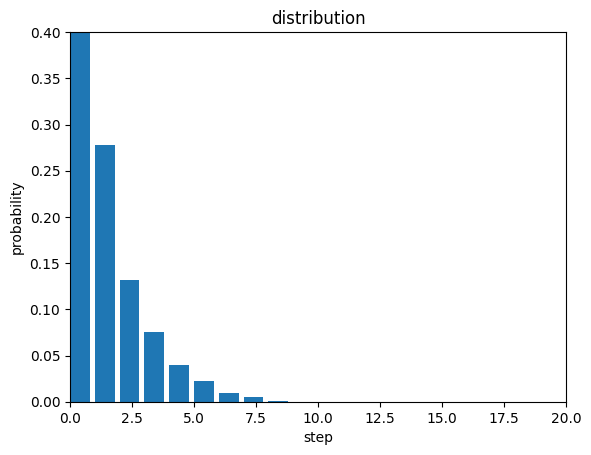

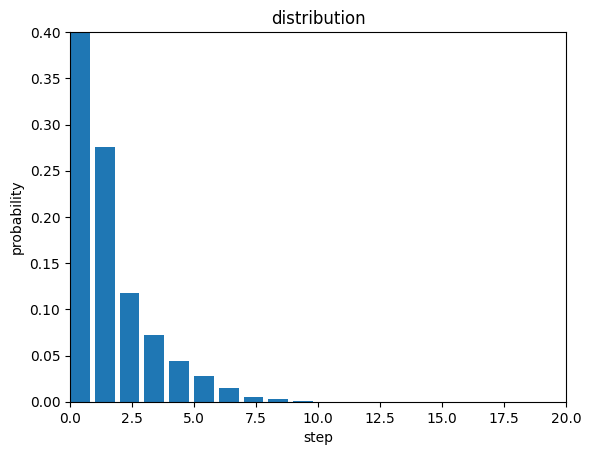

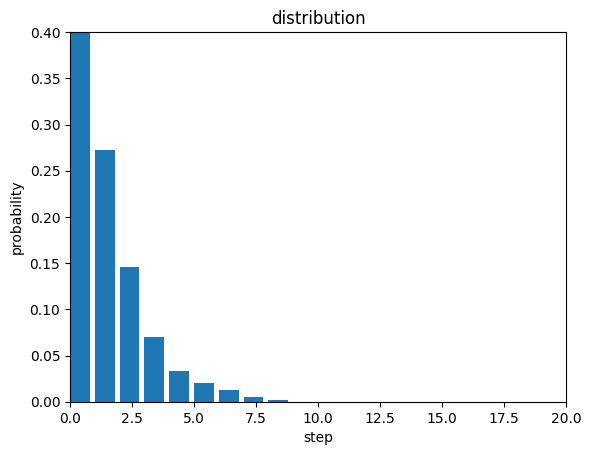

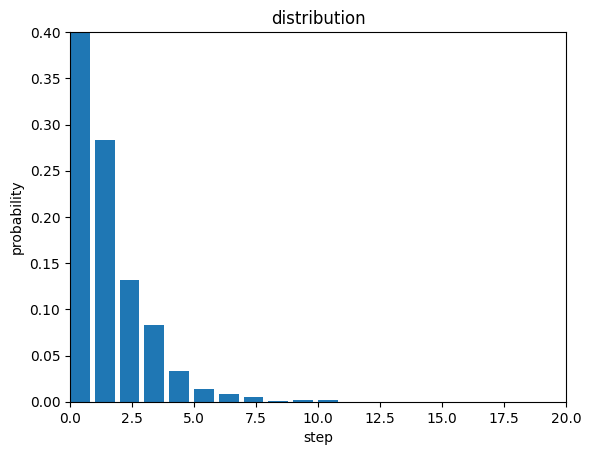

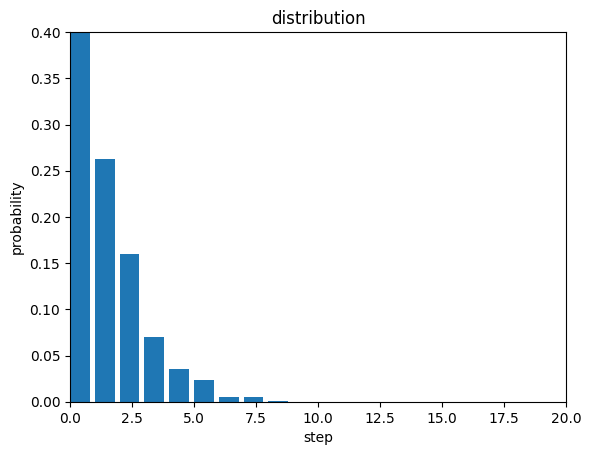

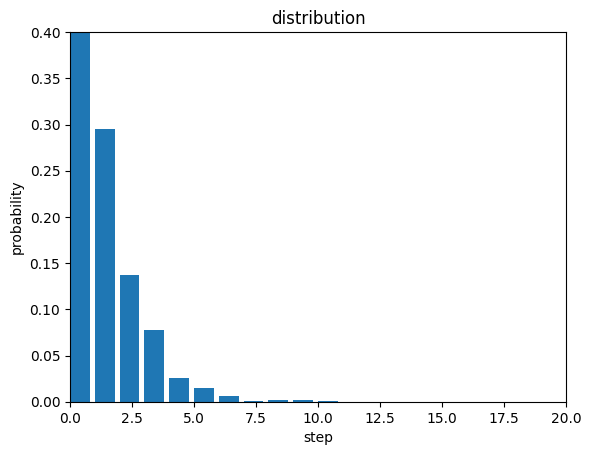

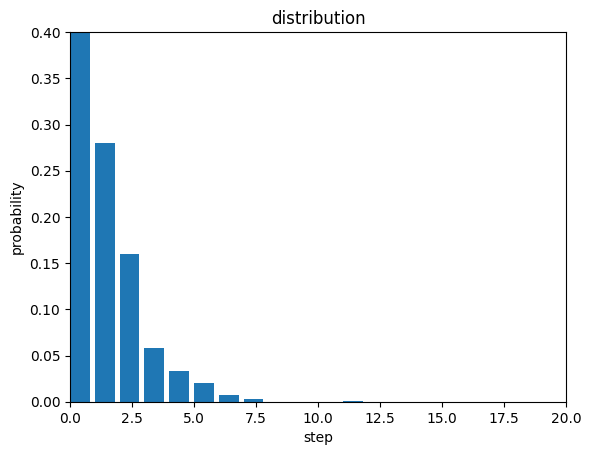

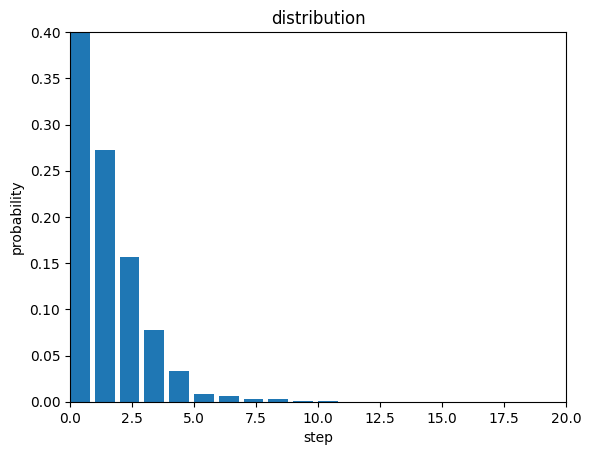

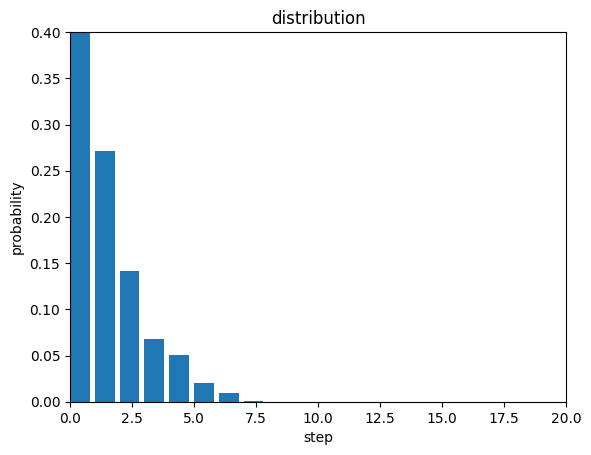

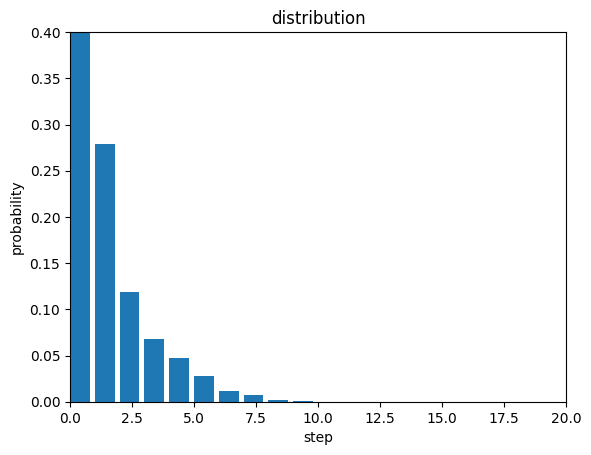

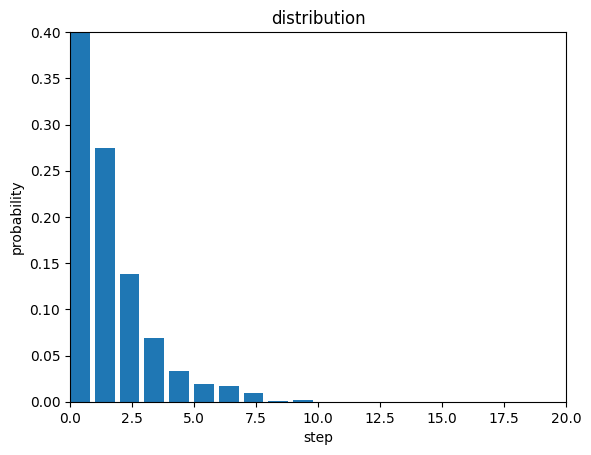

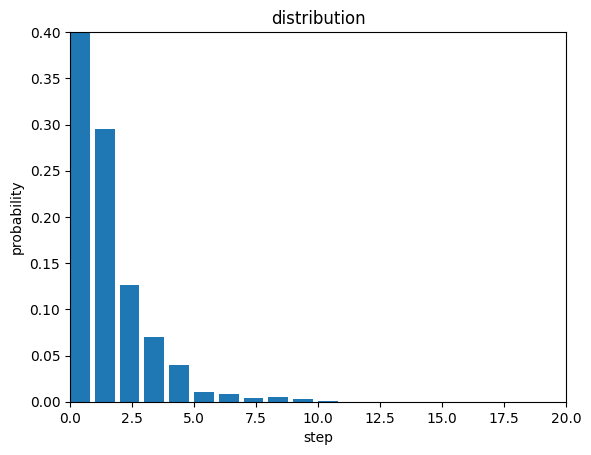

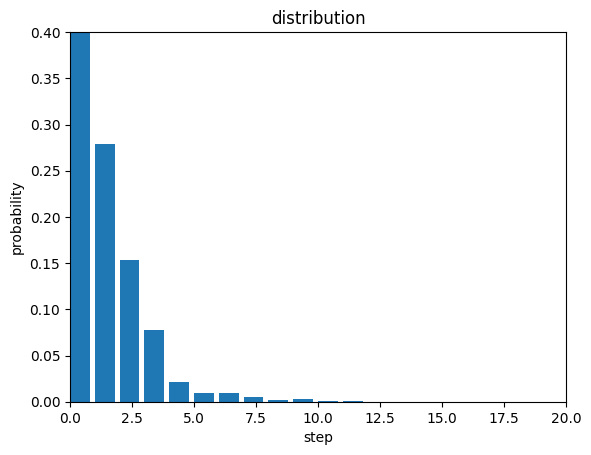

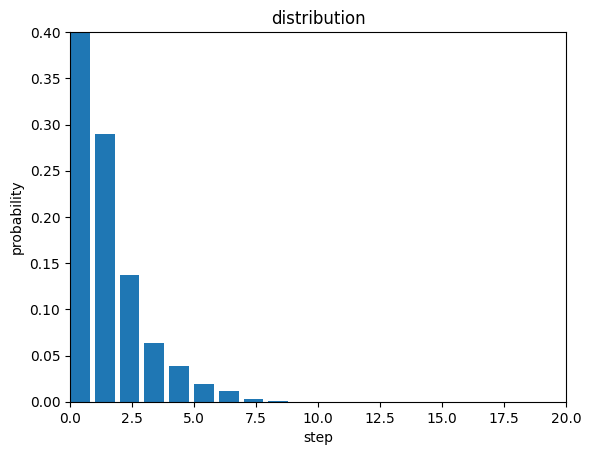

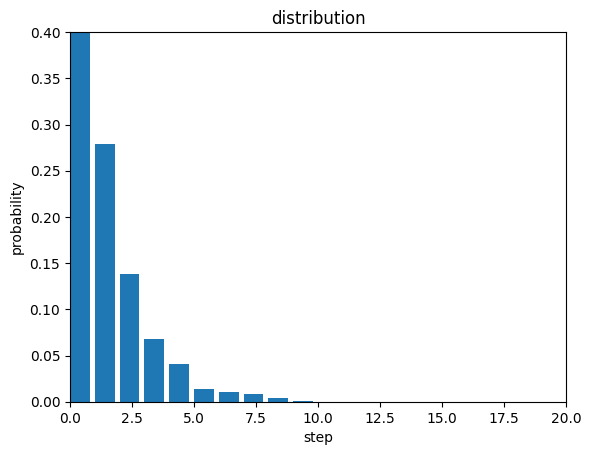

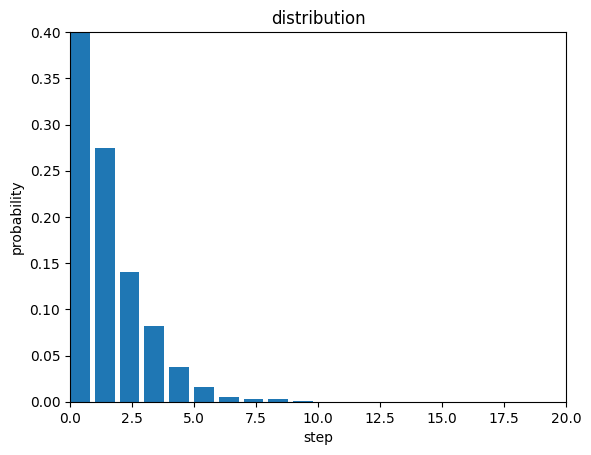

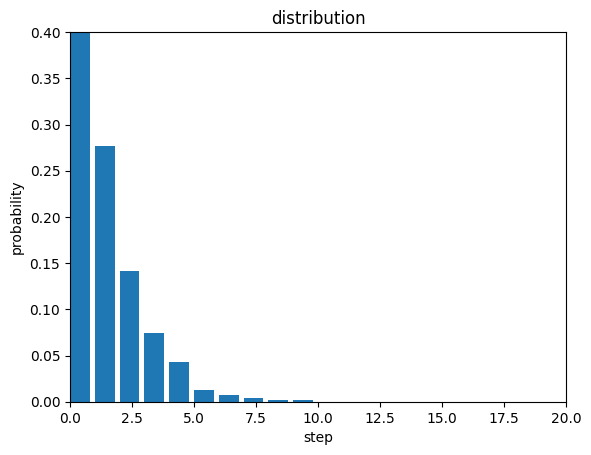

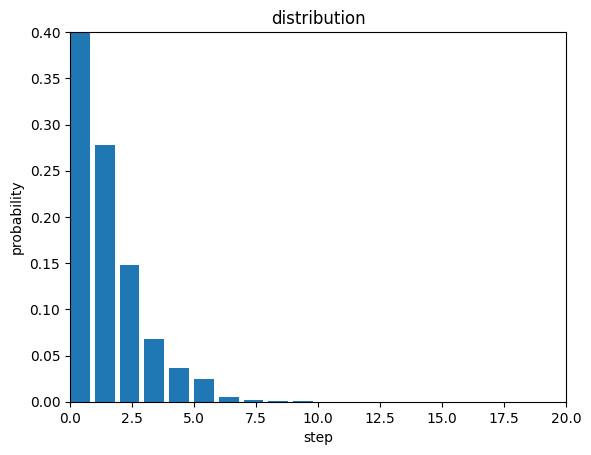

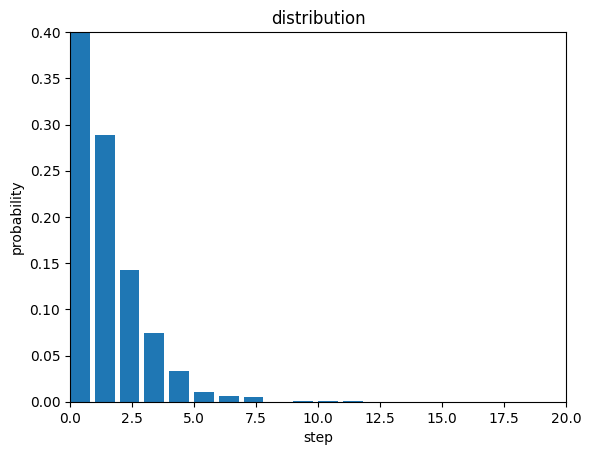

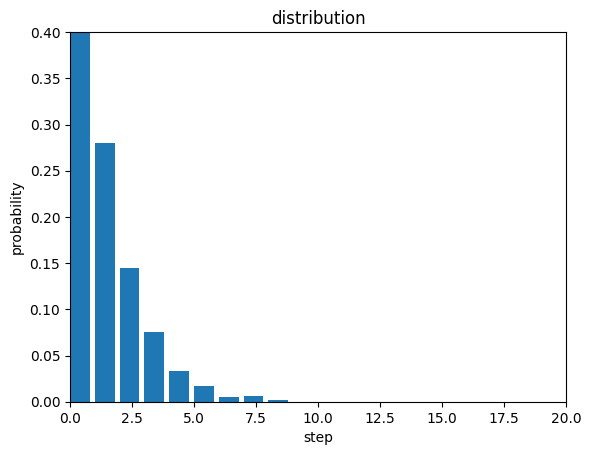

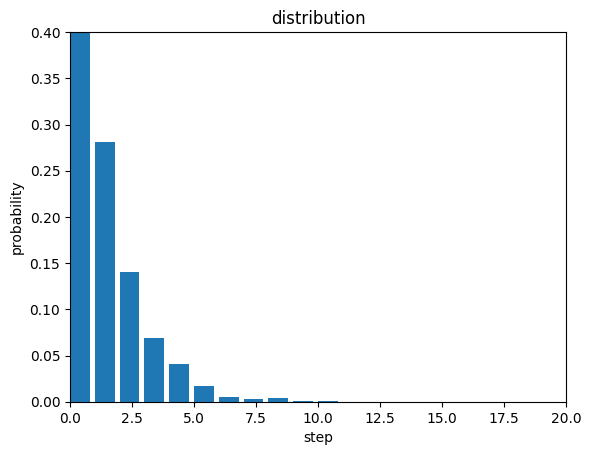

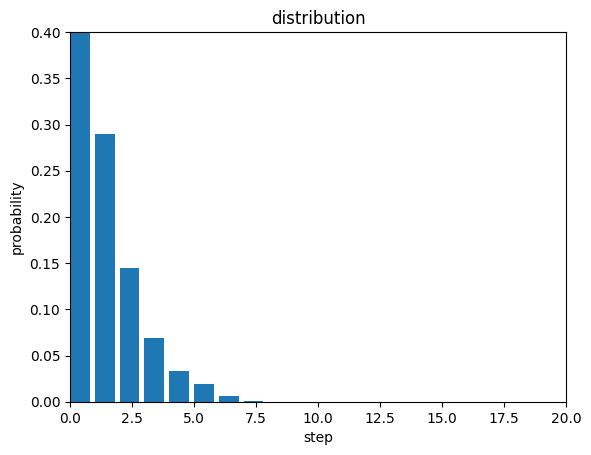

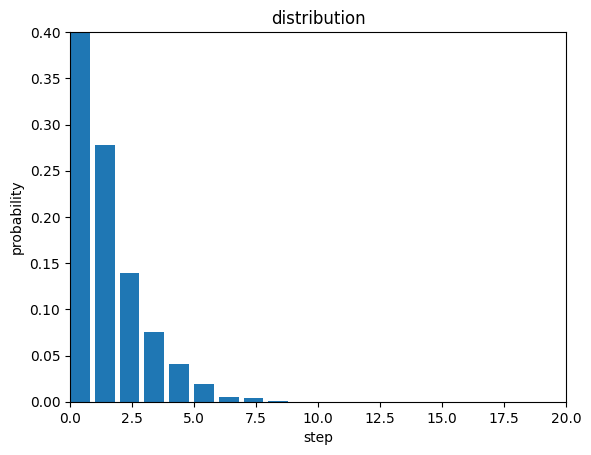

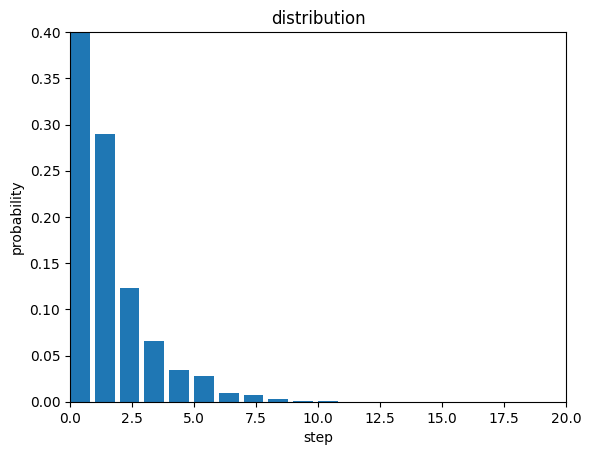

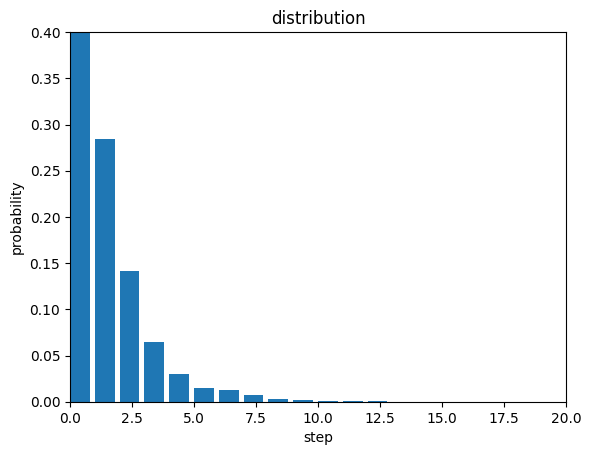

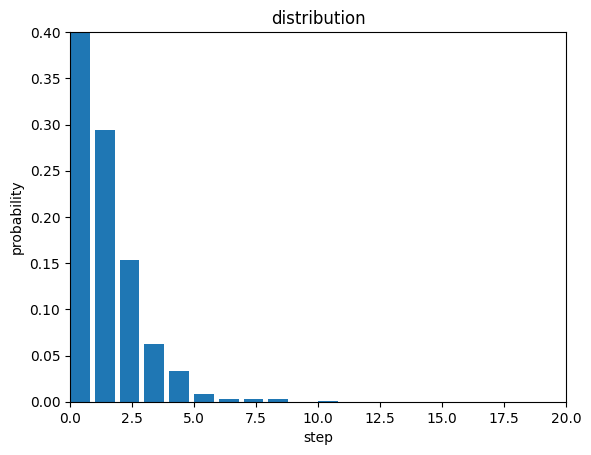

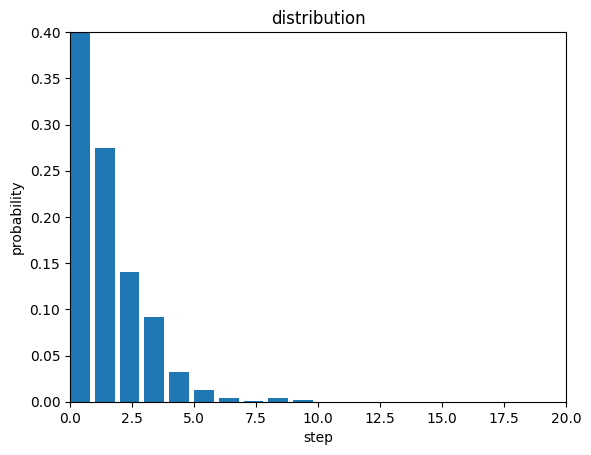

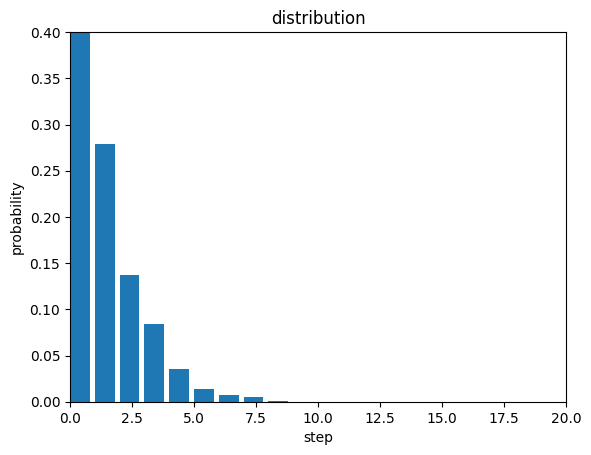

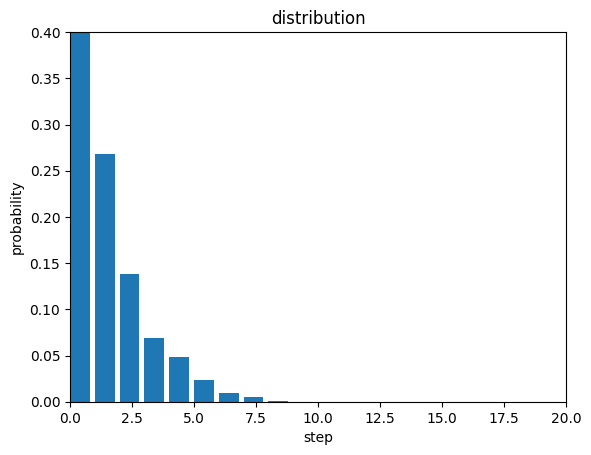

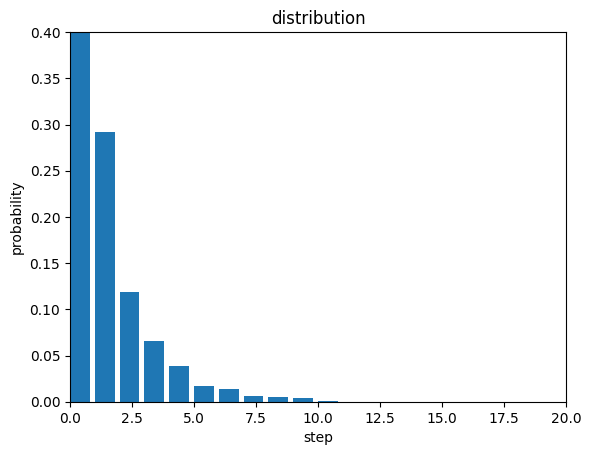

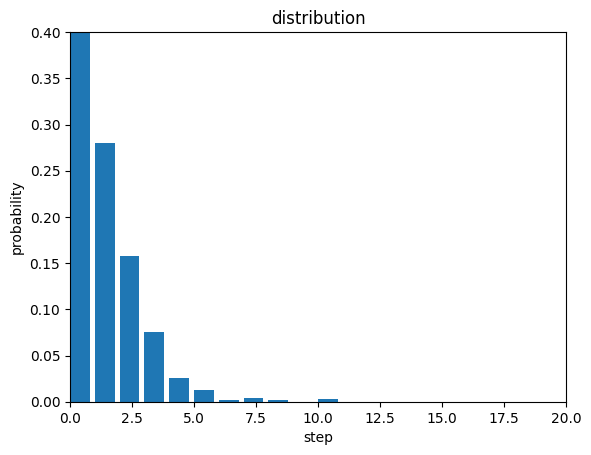

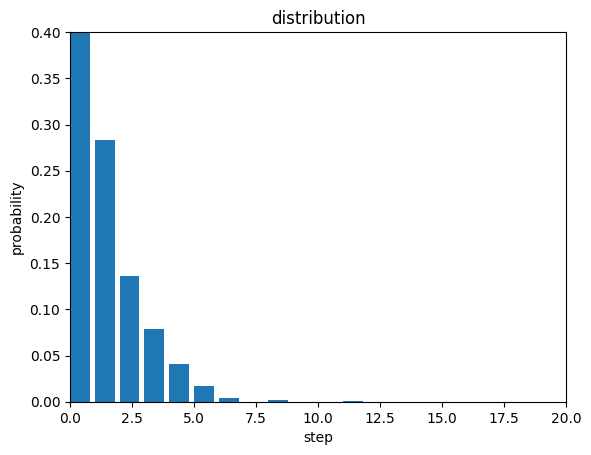

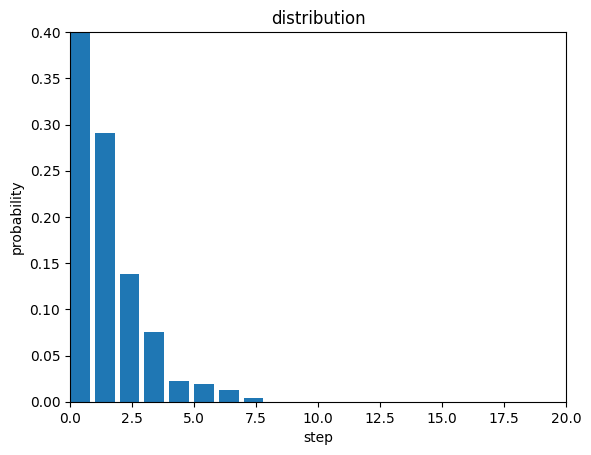

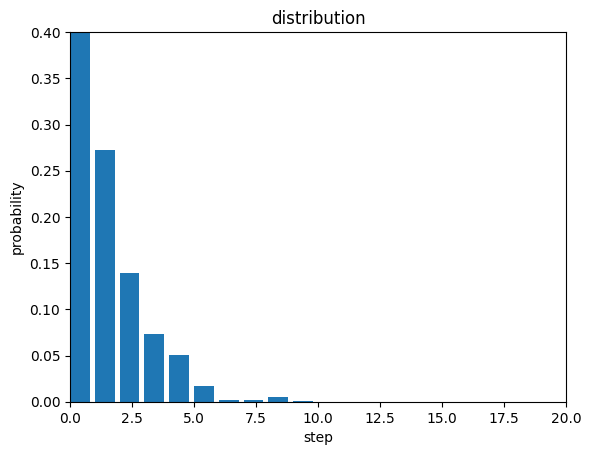

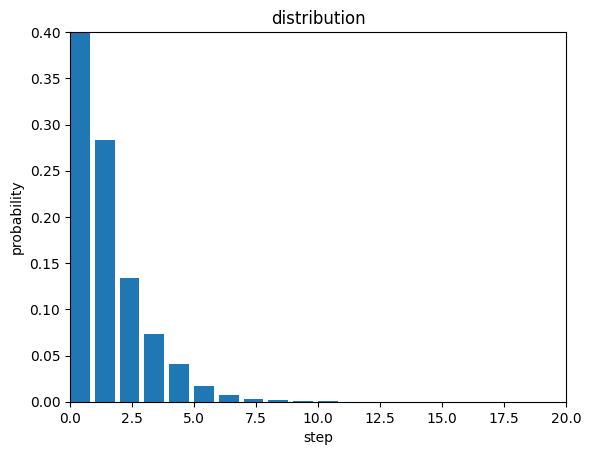

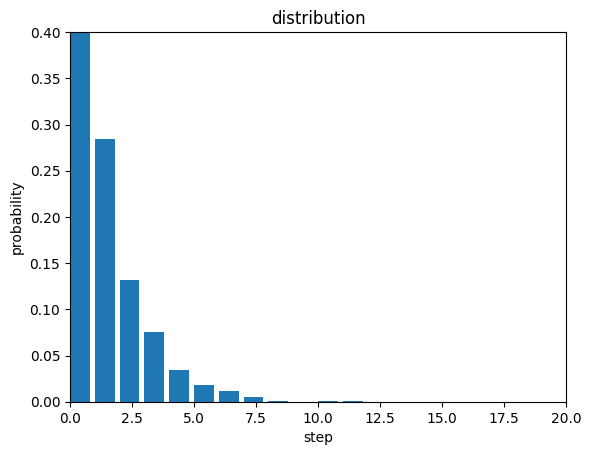

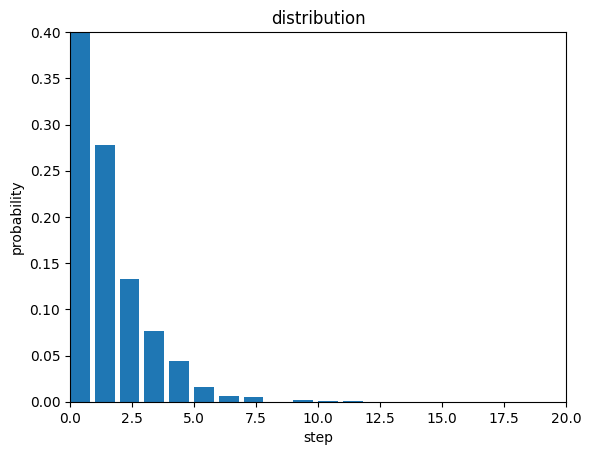

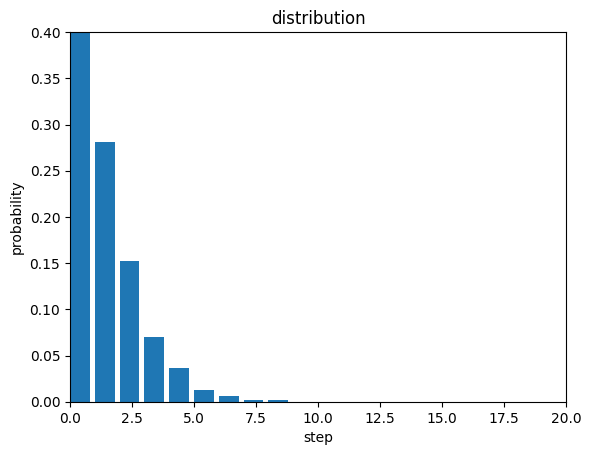

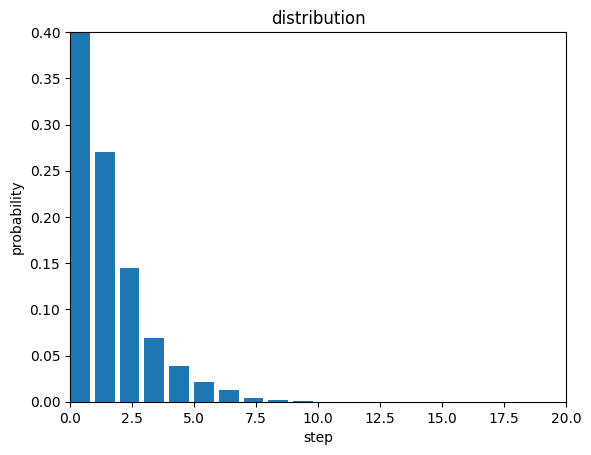

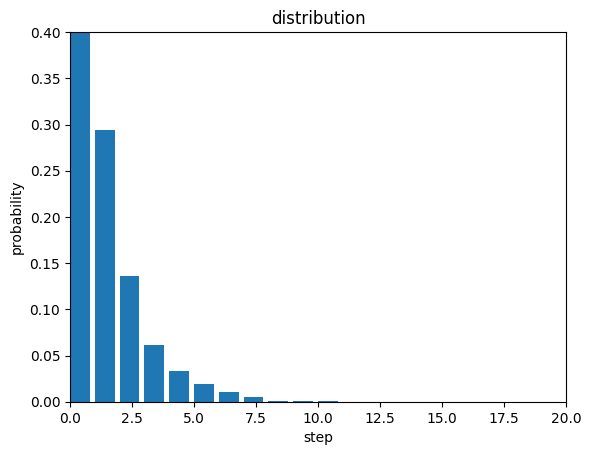

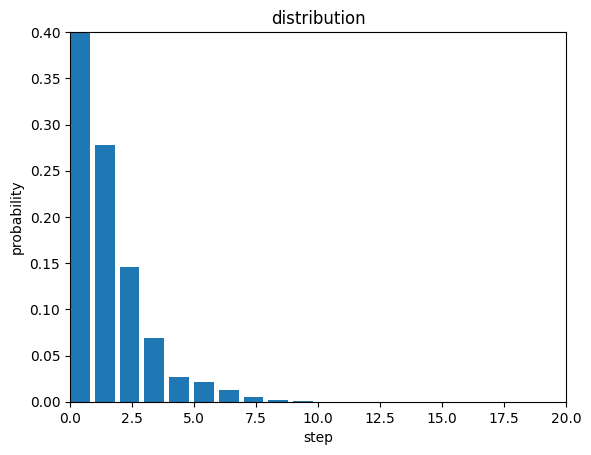

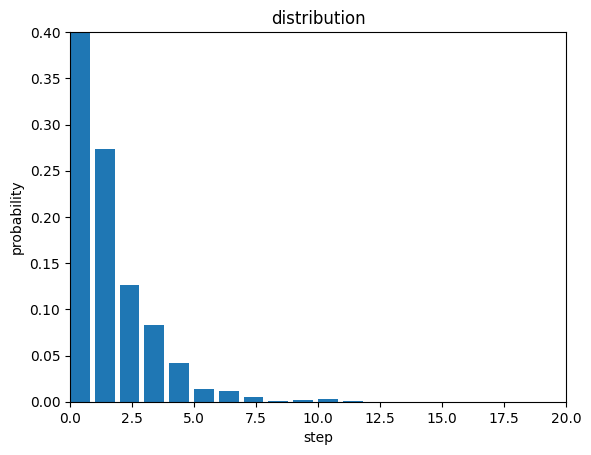

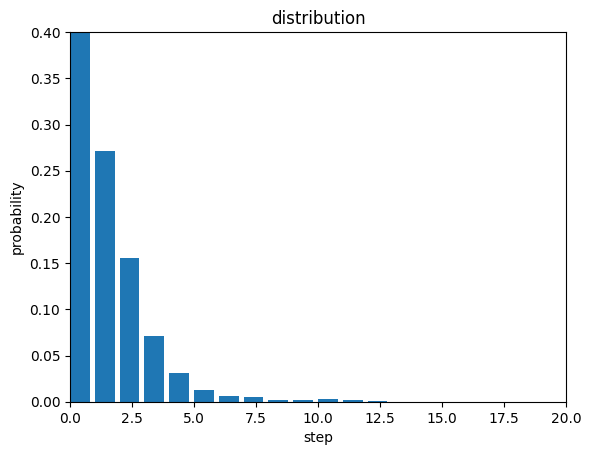

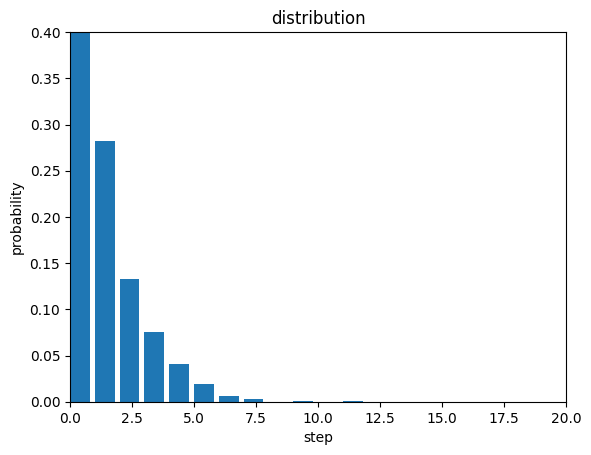

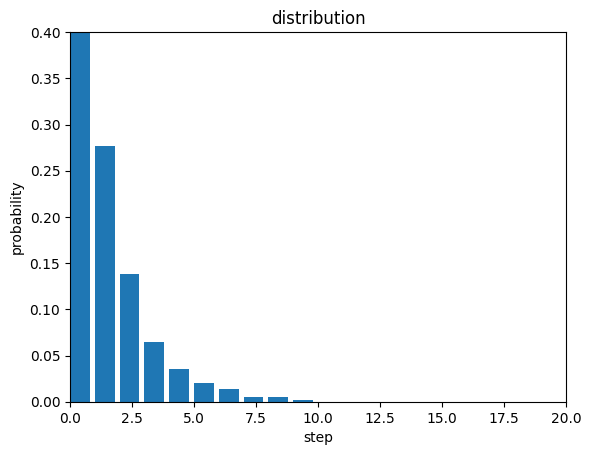

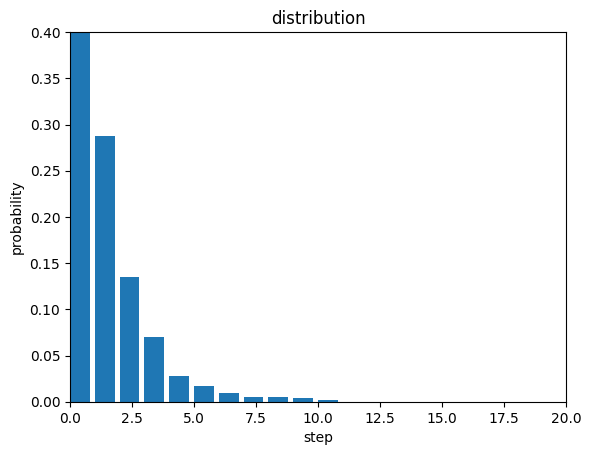

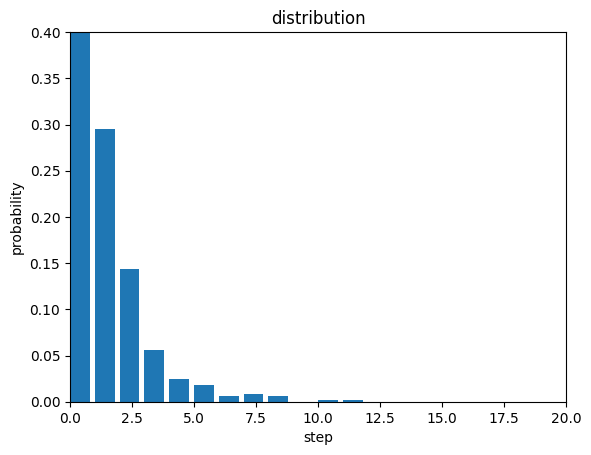

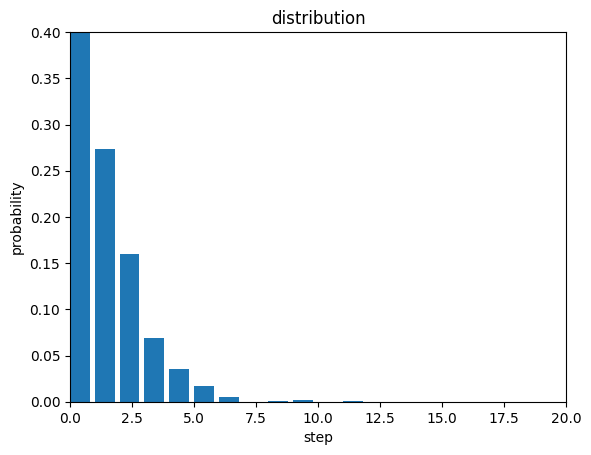

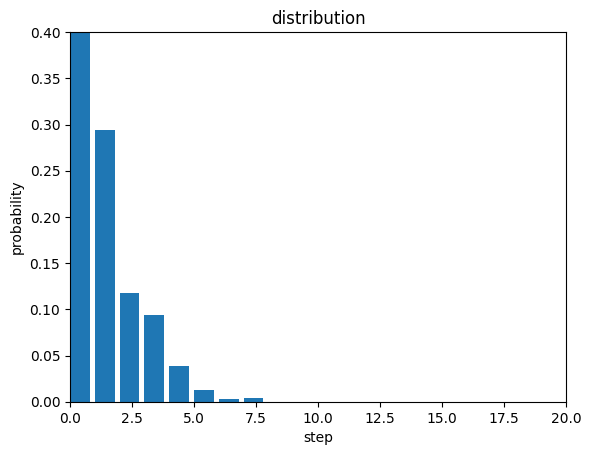

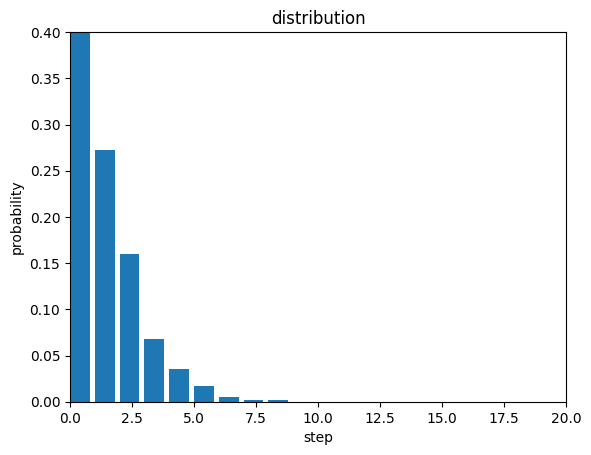

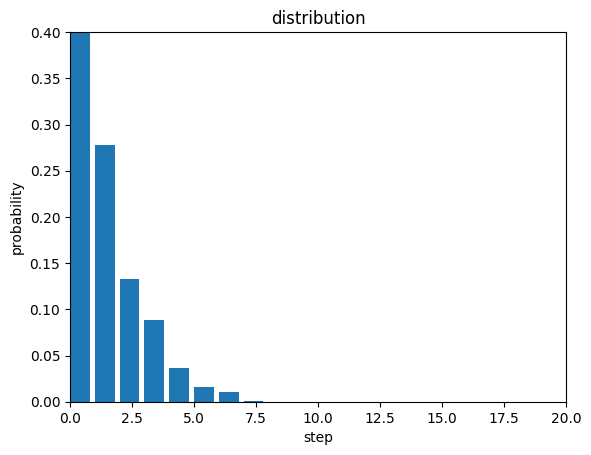

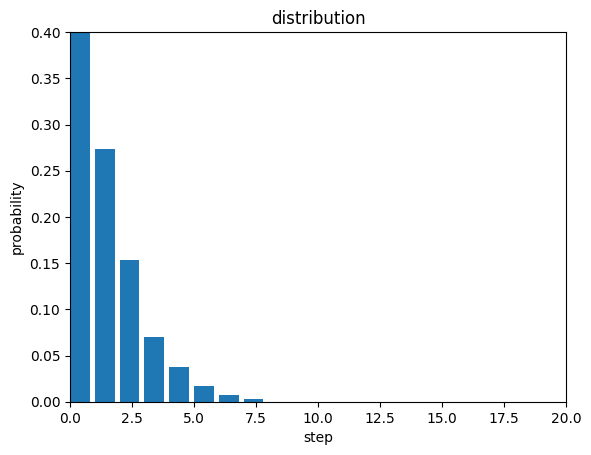

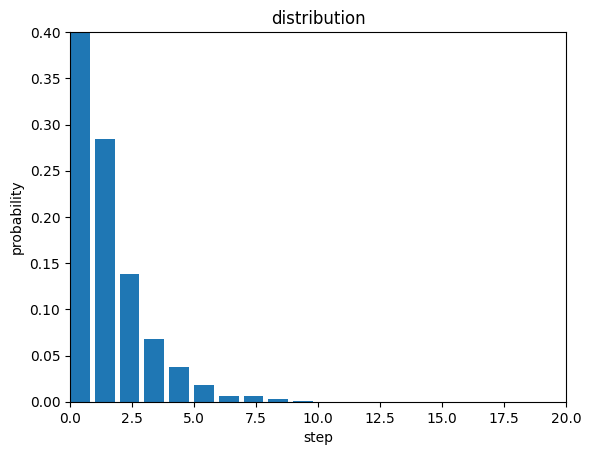

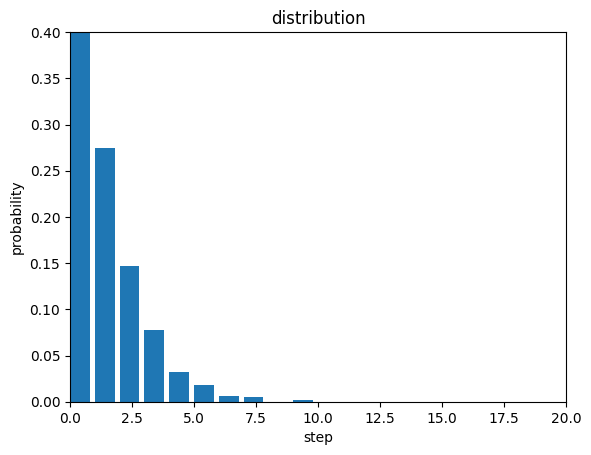

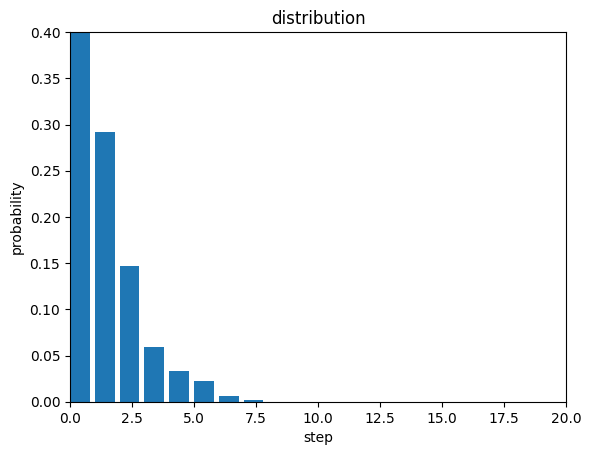

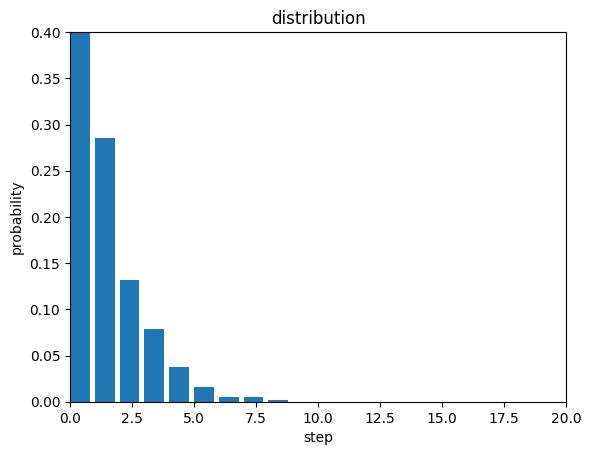

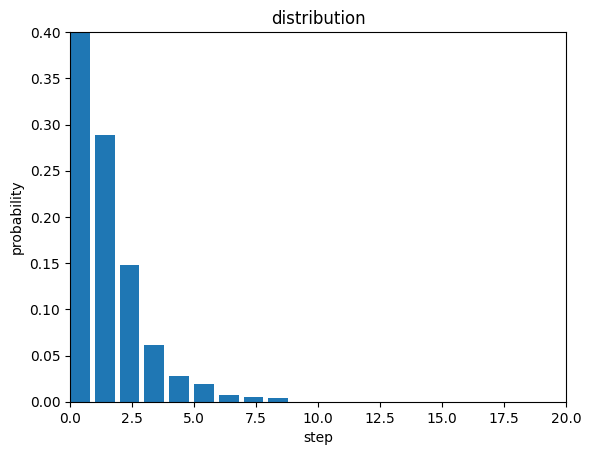

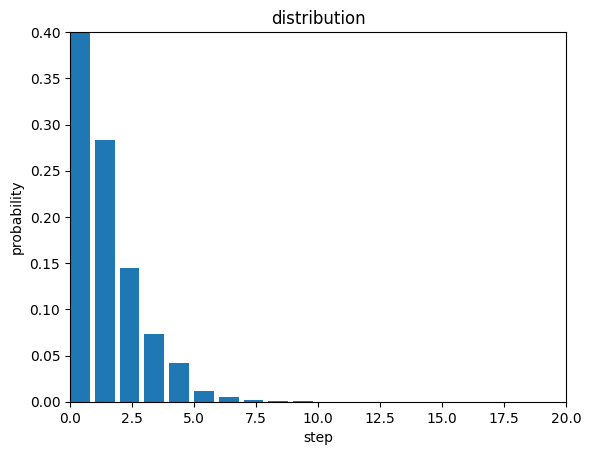

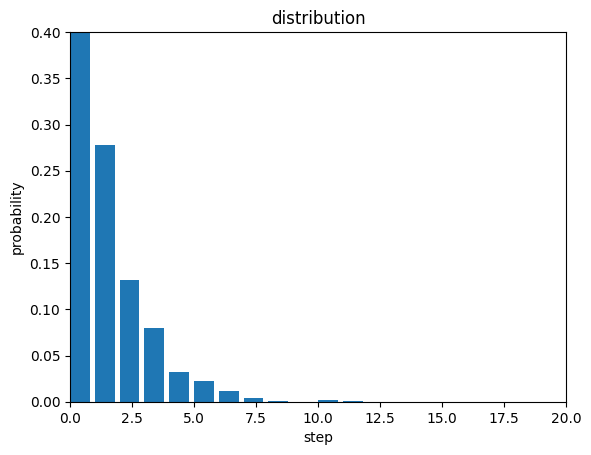

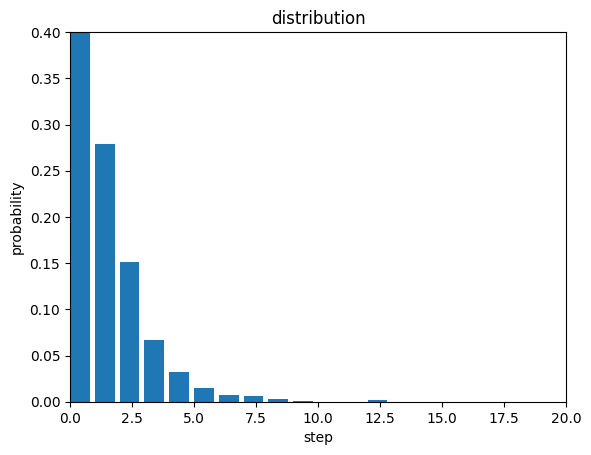

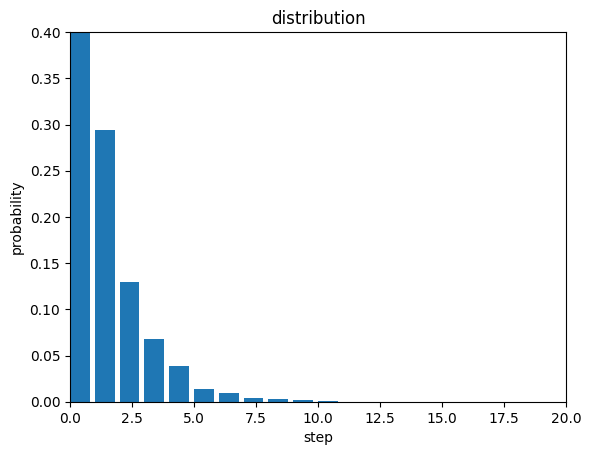

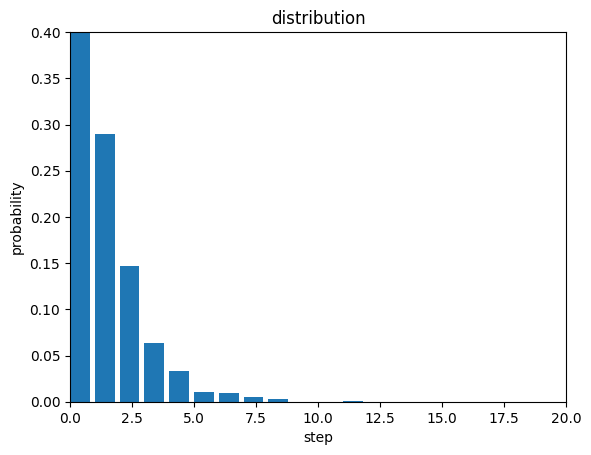

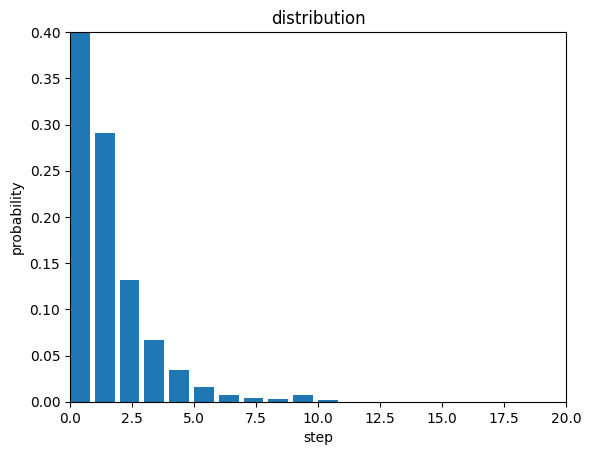

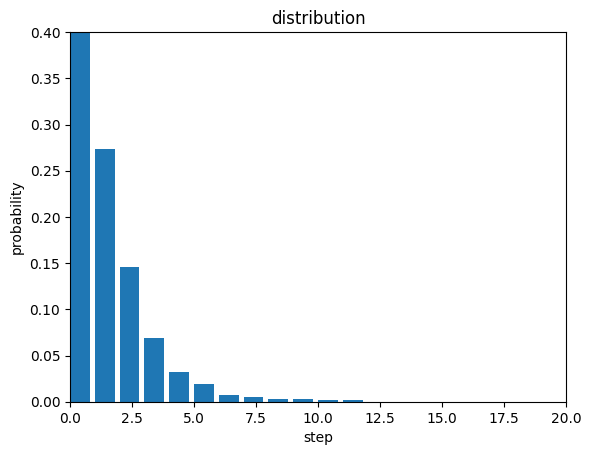

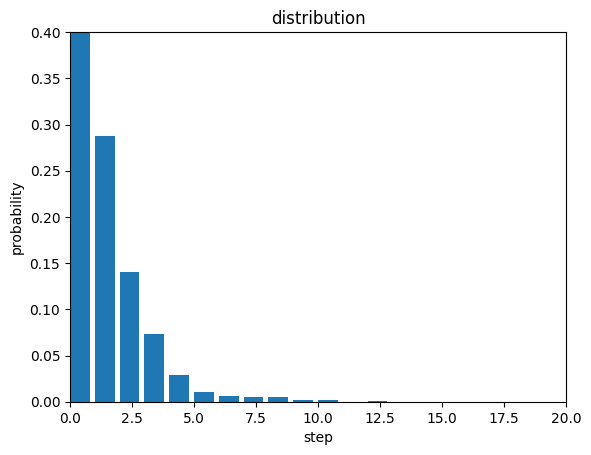

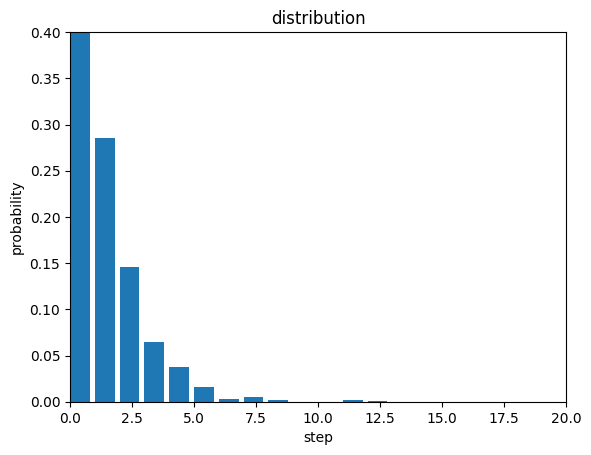

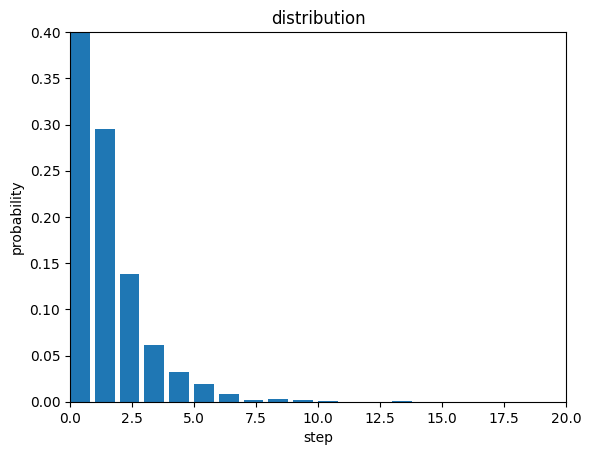

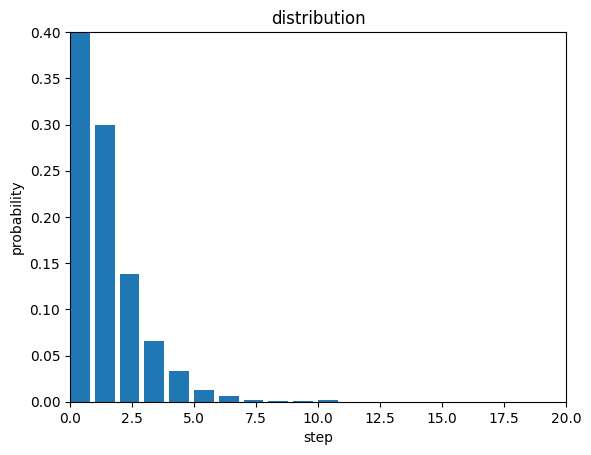

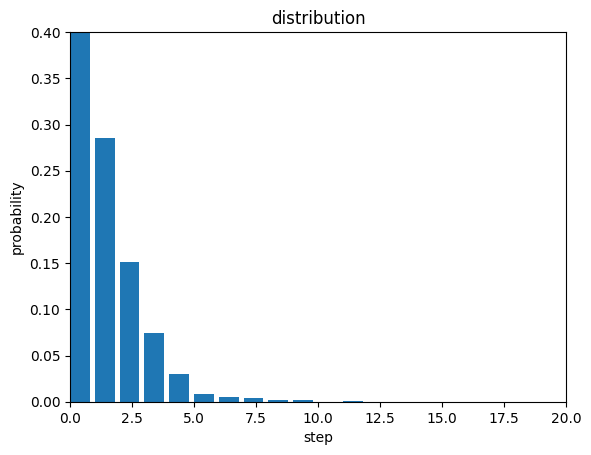

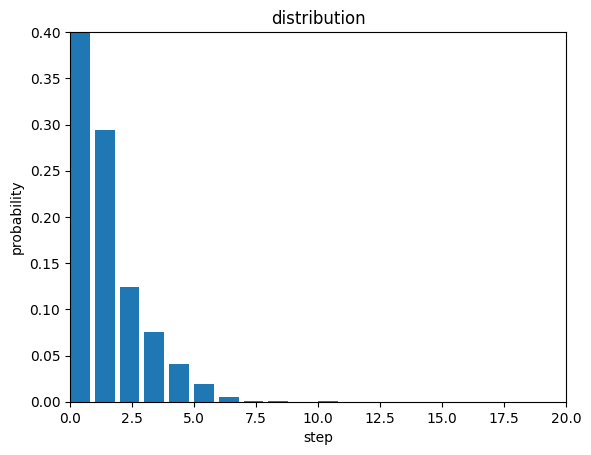

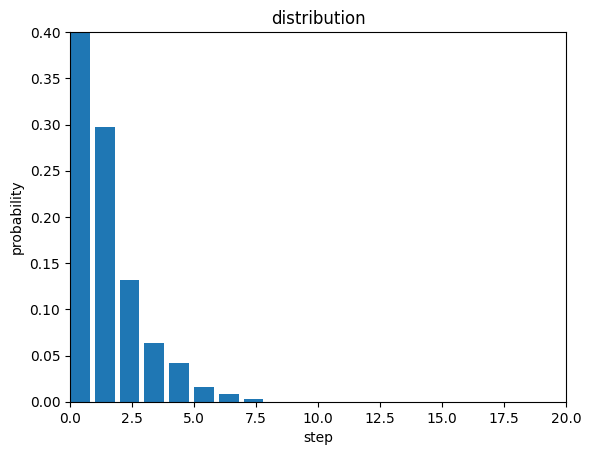

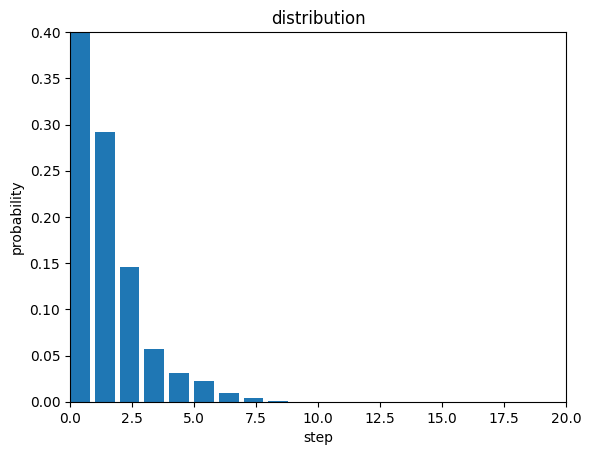

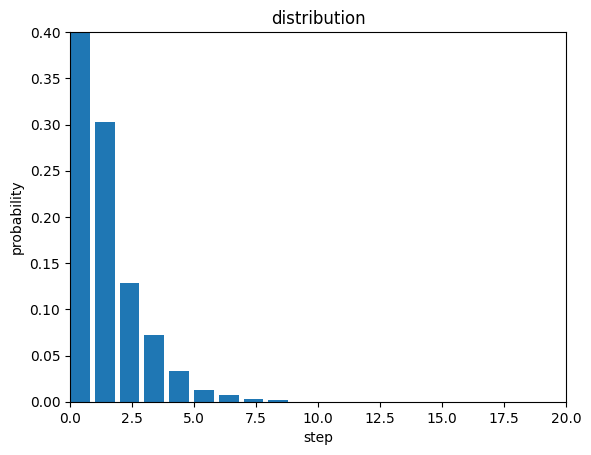

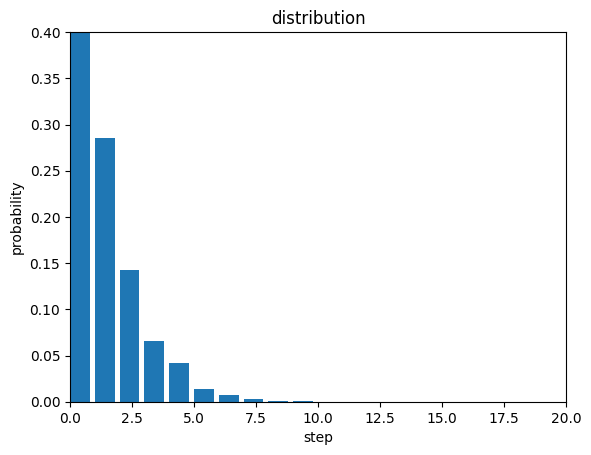

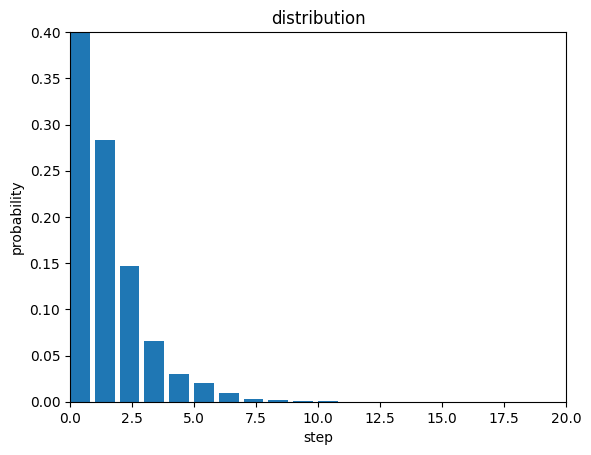

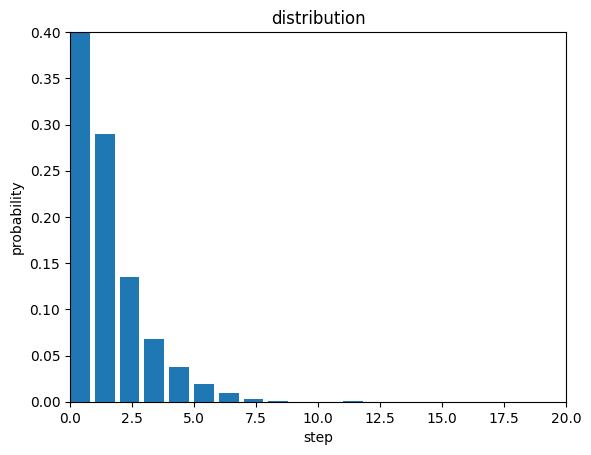

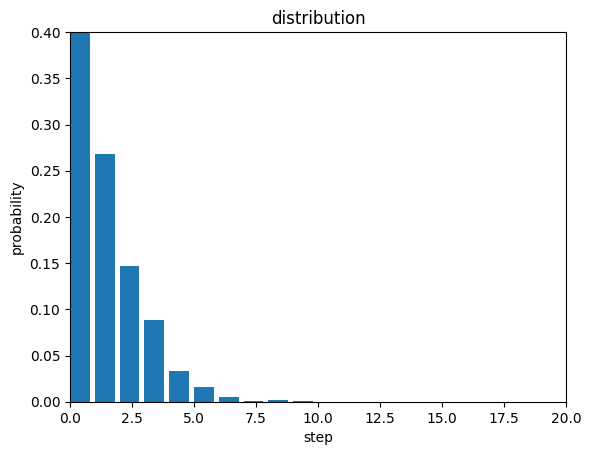

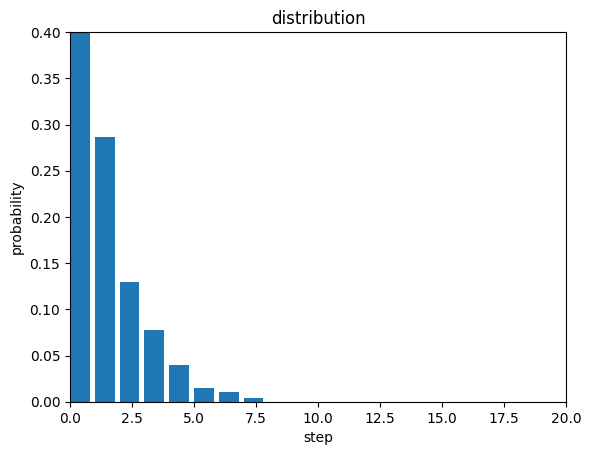

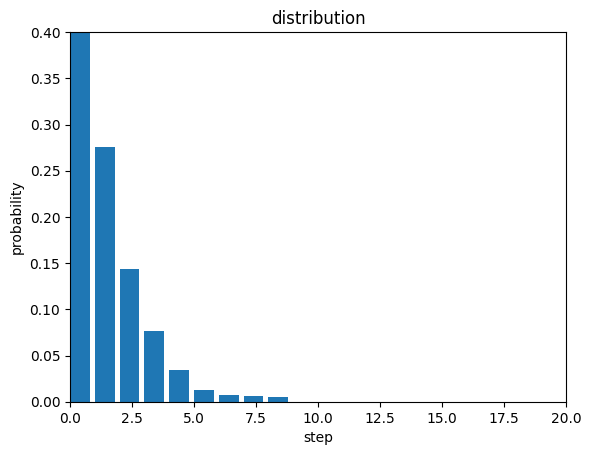

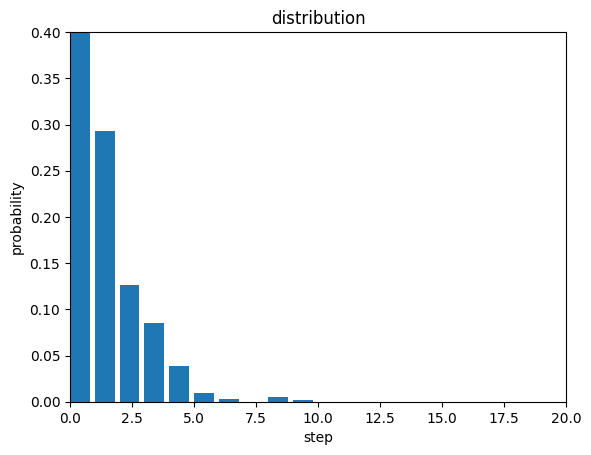

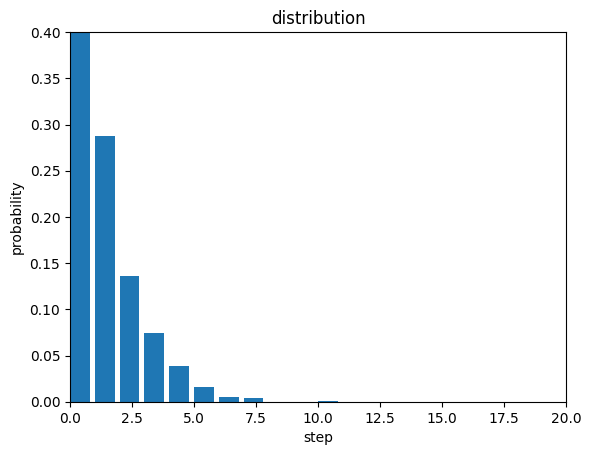

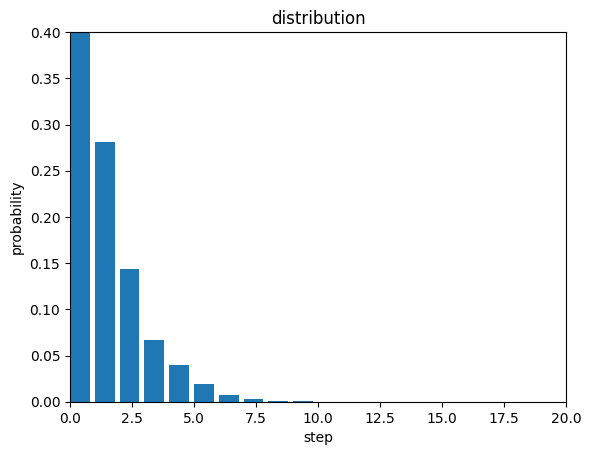

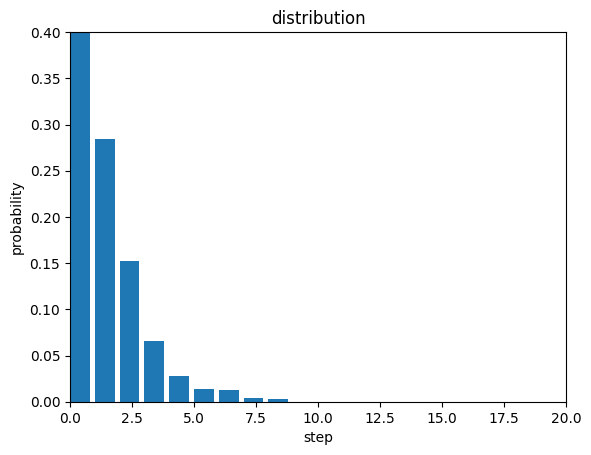

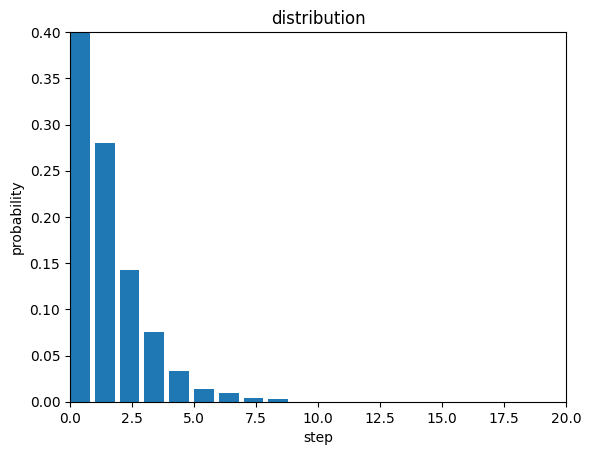

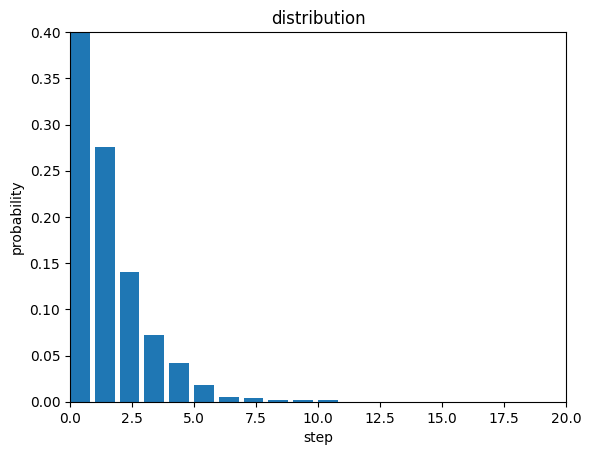

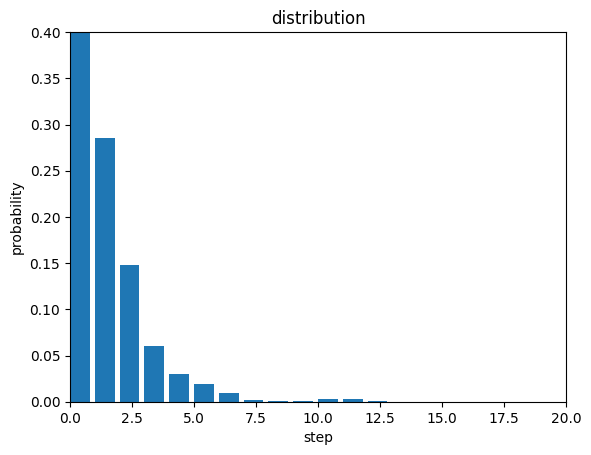

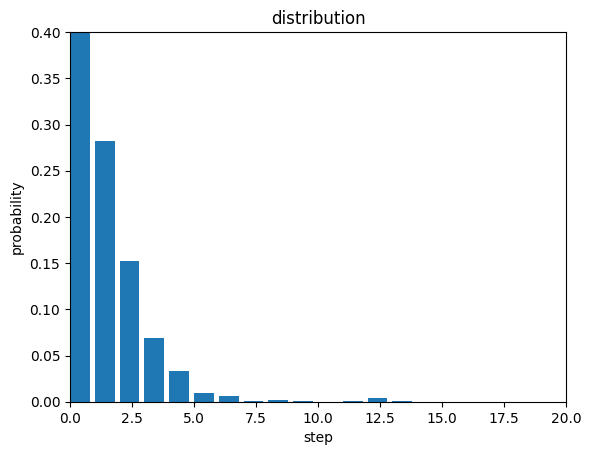

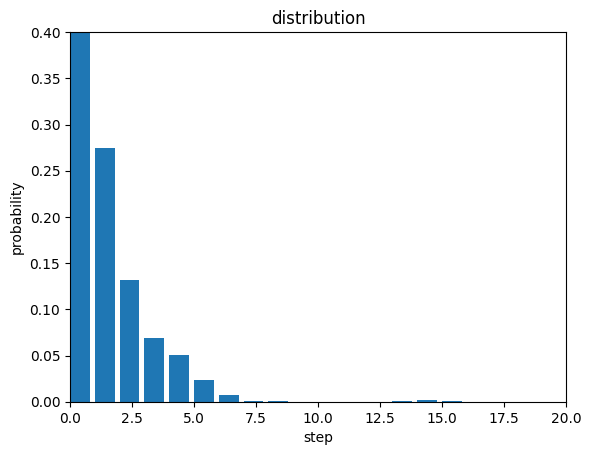

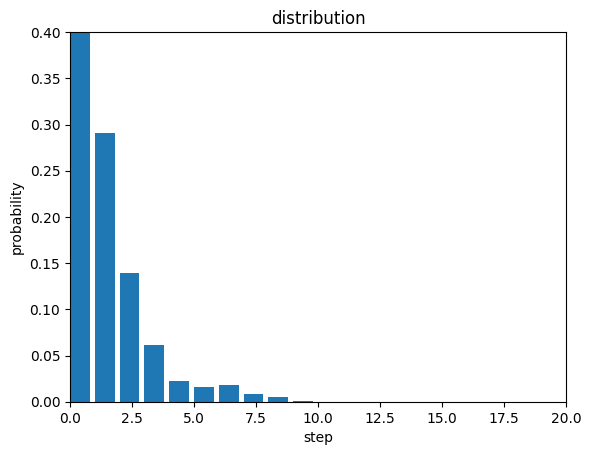

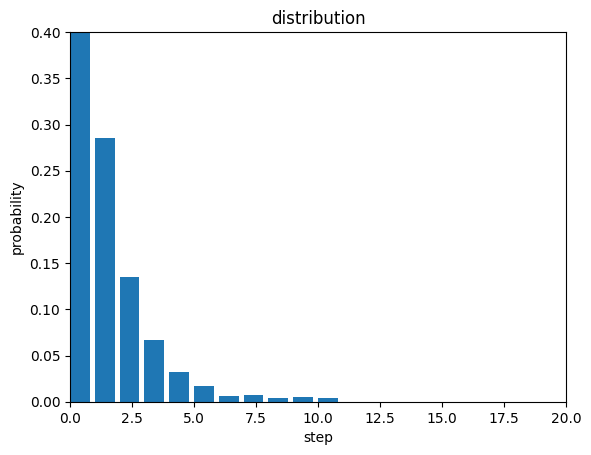

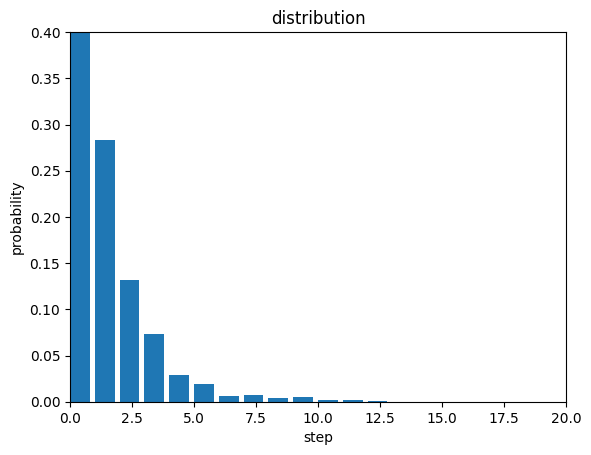

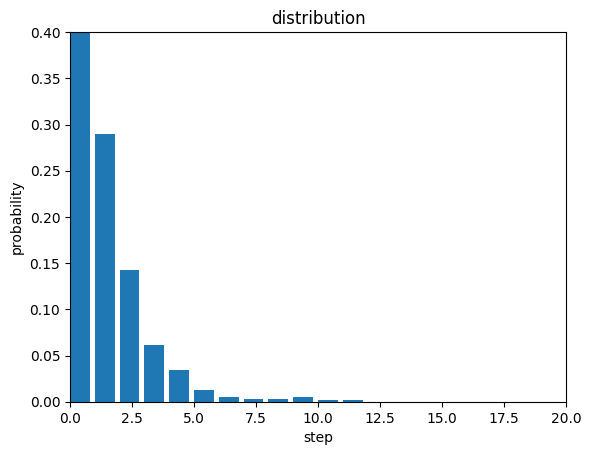

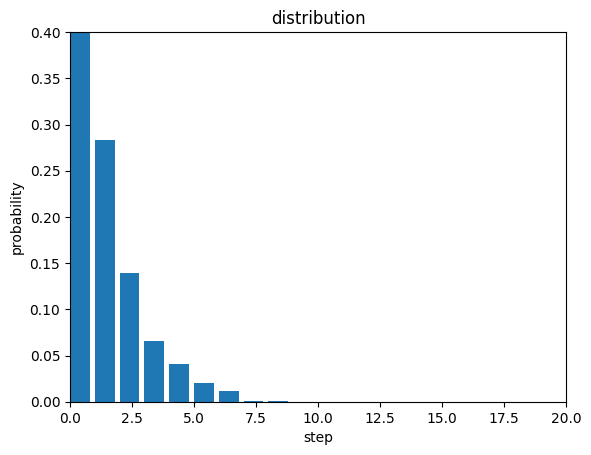

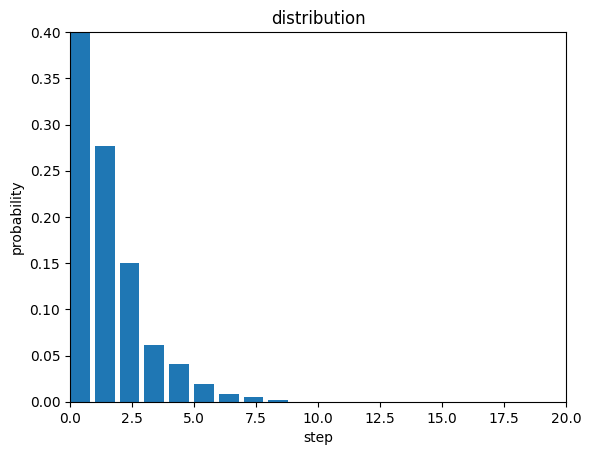

In [1]:
import numpy as np
from yl import distribution,expect,get_param

from matplotlib import pyplot as plt
import io
from PIL import Image

replay_buffer = np.zeros((800))

id = 0

batch_size = 6

T = 10000

distributions  = []

for i in range(T):
    potential_idx = np.arange(0,800)
    ids = np.random.choice(potential_idx, size = batch_size, replace=False)
    steps = replay_buffer[ids]
    steps = steps + 1
    where = np.where(steps==20) [0]
    steps[ids[where]] = 10
    replay_buffer[id:id+batch_size] = steps
    replay_buffer[id:id+2] = 1
    id = id + batch_size + 2
    if id >= 800:
        id = 0
    distribution_i = np.array([ np.sum(replay_buffer==i) / 800 for i in range(20)])
    real = distribution_i * (3/4)
    real[0] += 1/4
    if i % 100 ==0:
        # print(real)
        distributions.append(real)
    
# plt.plot(x, line_0, label='0')
images = []
x = [i for i in range(20)]

x = np.array(x)
x = x + 0.4
for line in distributions:
    fig, ax = plt.subplots()
    ax.bar(x, line,width=0.8)
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 0.4)
    # set x title of 'steps'
    # set y title of 'probability'
    # set title of 'distribution'
    ax.set_title('distribution')
    
    ax.set_xlabel('step')
    ax.set_ylabel('probability')

    buf = io.BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    image = Image.open(buf)
    images.append(image)
    # buf.close()

    
images[0].save('distributions.gif', save_all=True, append_images=images[1:], optimize=False, duration=100, loop=0)

In [ ]:
images[0]

In [ ]:
from yl import get_param,expect,distribution


x_solution = get_param(12)[0]
print(x_solution)
print(expect(x_solution))
print(distribution(x_solution))